#**Python Primer and Google Colab**



A notebook consists of 'cells' that can each be run individually.

Let's look at some examples of Python commands.

In [ ]:
# <--This '#' symbol means that this line is a 'comment' and does not get run as an instruction

In [ ]:
4+3

In [ ]:
print("Hello World")

In [ ]:
my_variable = 24 * 60 * 60
print("Seconds in a day:", my_variable)

In [ ]:
a = input("Type anything you want: ")
print("The reply was:", a)

In [ ]:
num = 33
answer = "I don't know yet"
print(answer)

if num > 20:
  answer = "Bigger"
else:
  answer = "Smaller"
print(answer)

In [ ]:
my_list = [3, 5, 2, 1, 4]

print("List at first position (element 0):", my_list[0])
print("List length:", len(my_list))
print("Sorted list:", sorted(my_list))

In [ ]:
for value in my_list:
  print("Value:", value, "Squared:", value*value)

In [ ]:
from math import pi

print(round(pi, 2))

Note: After a Google Colab runtime is closed, all variables will lose their values.



Let's connect this Colab notebook to our Google Drive so that we can save files when we need to.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Google Colab runs in a linux environment on the cloud. 

To run an instruction as a linux command instead of a Python statement, we start the line with a '!'.

Let's make a new folder in our Google Drive.

In [ ]:
!git clone https://github.com/ersilia-os/event-fund-ai-drug-discovery.git /content/drive/MyDrive/DataScience_Workshop

Lastly, let's check that we can read the test file in our new folder.

In [ ]:
with open("drive/MyDrive/DataScience_Workshop/data/Day1/workshop_test_file.txt", "r") as f:
  print(f.read())

#**Intro to ChEMBL**

ChEMBL ID: CHEMBL...

ChEMBL data files have fields separated by a ';'. Let's load this into a Pandas dataframe and save a new file that will be comma-separated.

In [ ]:
import pandas as pd

dataframe = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/Day1/gsk_3d7_raw.csv", sep=";")
dataframe

In [ ]:
actives = dataframe.loc[dataframe['Standard Value'] < 100]
actives.to_csv("drive/MyDrive/DataScience_Workshop/data/Day1/gsk_3d7_actives.csv")
actives

#**Visualising Compound Similarity**

In [2]:
%%capture
!pip install rdkit-pypi
!pip install umap-learn
import sys
sys.path.append("drive/MyDrive/DataScience_Workshop/data/Day1/")
from courseFunctions import *

In [6]:
path = "drive/MyDrive/DataScience_Workshop/data/Day1/"
file_list = ["gsk_3d7_raw.csv", "gsk_3d7_actives.csv"]
my_plots = plots(path, file_list)

<Figure size 432x288 with 0 Axes>

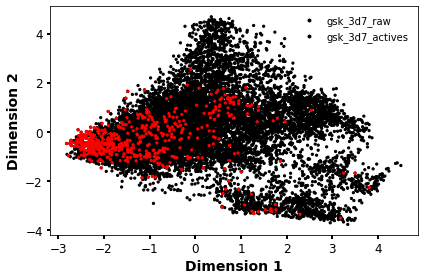

In [7]:
my_plots.plot_pca()

<Figure size 432x288 with 0 Axes>

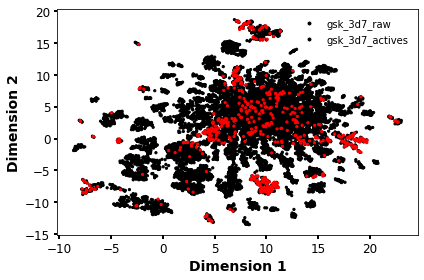

In [8]:
my_plots.plot_umap()

###Now it's your turn.

In [ ]:
#Download St Jude data and save in gdrive

In [ ]:
path = "drive/MyDrive/DataScience_Workshop/data/Day1/"
file_list = ["", ""]
my_plots2 = plots(path, file_list)

In [ ]:
my_plots2.plot_PCA()

In [ ]:
my_plots2.plot_UMAP()

#**Breakout Session:** (3 sessions of 20-30 mins)
________________________

#**Computational Tools Discussion**



*   Introduce yourself and your project/field of expertise.
*   What current computational tools do you use for your research?
*   What challenges/limitations do you face in making further use of data science tools?
*   Any ideas on how to address these issues?



#**Chemical Space Discussion**

What is meant by chemical space?

Which of these series fall out of the chemical space?
Does this make them more likely or less likely to be predicted?
Does this mean we need more data to model the series?

In [ ]:
import requests
from IPython.display import Image
from IPython.display import display

img0 = Image("/content/drive/MyDrive/DataScience_Workshop_Day1_Files/PCA_chem_space.png") 
img1 = Image("/content/drive/MyDrive/DataScience_Workshop_Day1_Files/UMAP_chem_space.png") 

display(img0,img1)

In [ ]:
#Now run PI3K data through each and see which dataset might be better

#**Data Cleaning**

Discussion: What inconsistencies in drug discovery data might one need to address in order to standardise a dataset?

Look at the raw ChEMBL_A_Baumannii data for ideas (not limited to this).



*   Multiple data points per smiles
*   Highly Variable Data (data discrepancies)
*   Different Units
*   Standardise SMILES
*   Unnecessary columns
*   Points beyond assay limits of detection
*   Effect of different assay conditions




**Clean a ChEMBL Dataset** (Extension exercise)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import pandas as pd

PATH = "/content/drive/MyDrive/DataScience_Workshop_Day1_Files"
FILENAME = "Chembl_A_baumannii"

In [ ]:
#change seperator

In [ ]:
my_dataframe = pd.read_csv(os.path.join(PATH, FILENAME + ".csv"), sep=";")
my_dataframe

In [ ]:
my_dataframe.columns

In [ ]:
my_dataframe = my_dataframe[['Molecule ChEMBL ID', 'Smiles', 'Standard Value', 'Standard Units']]
my_dataframe

In [ ]:
my_dataframe.nunique()

In [ ]:
my_dataframe.dropna(subset=["Smiles"],inplace=True)
my_dataframe.drop_duplicates()
my_dataframe

In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

In [ ]:
mols = [Chem.MolFromSmiles(str(smi)) for smi in my_dataframe['Smiles'].tolist()]
canonical_smiles = [Chem.MolToSmiles(m) for m in mols]
my_dataframe["CAN_Smiles"] = canonical_smiles
my_dataframe

In [ ]:
actives = my_dataframe.loc[my_dataframe['Standard Value'] < 200]
actives

In [ ]:
my_dataframe.to_csv(os.path.join(PATH, FILENAME + "_processed.csv"), index=False)
actives.to_csv(os.path.join(PATH, FILENAME + "_actives.csv"), index=False)

In [ ]:
#check through ersilia